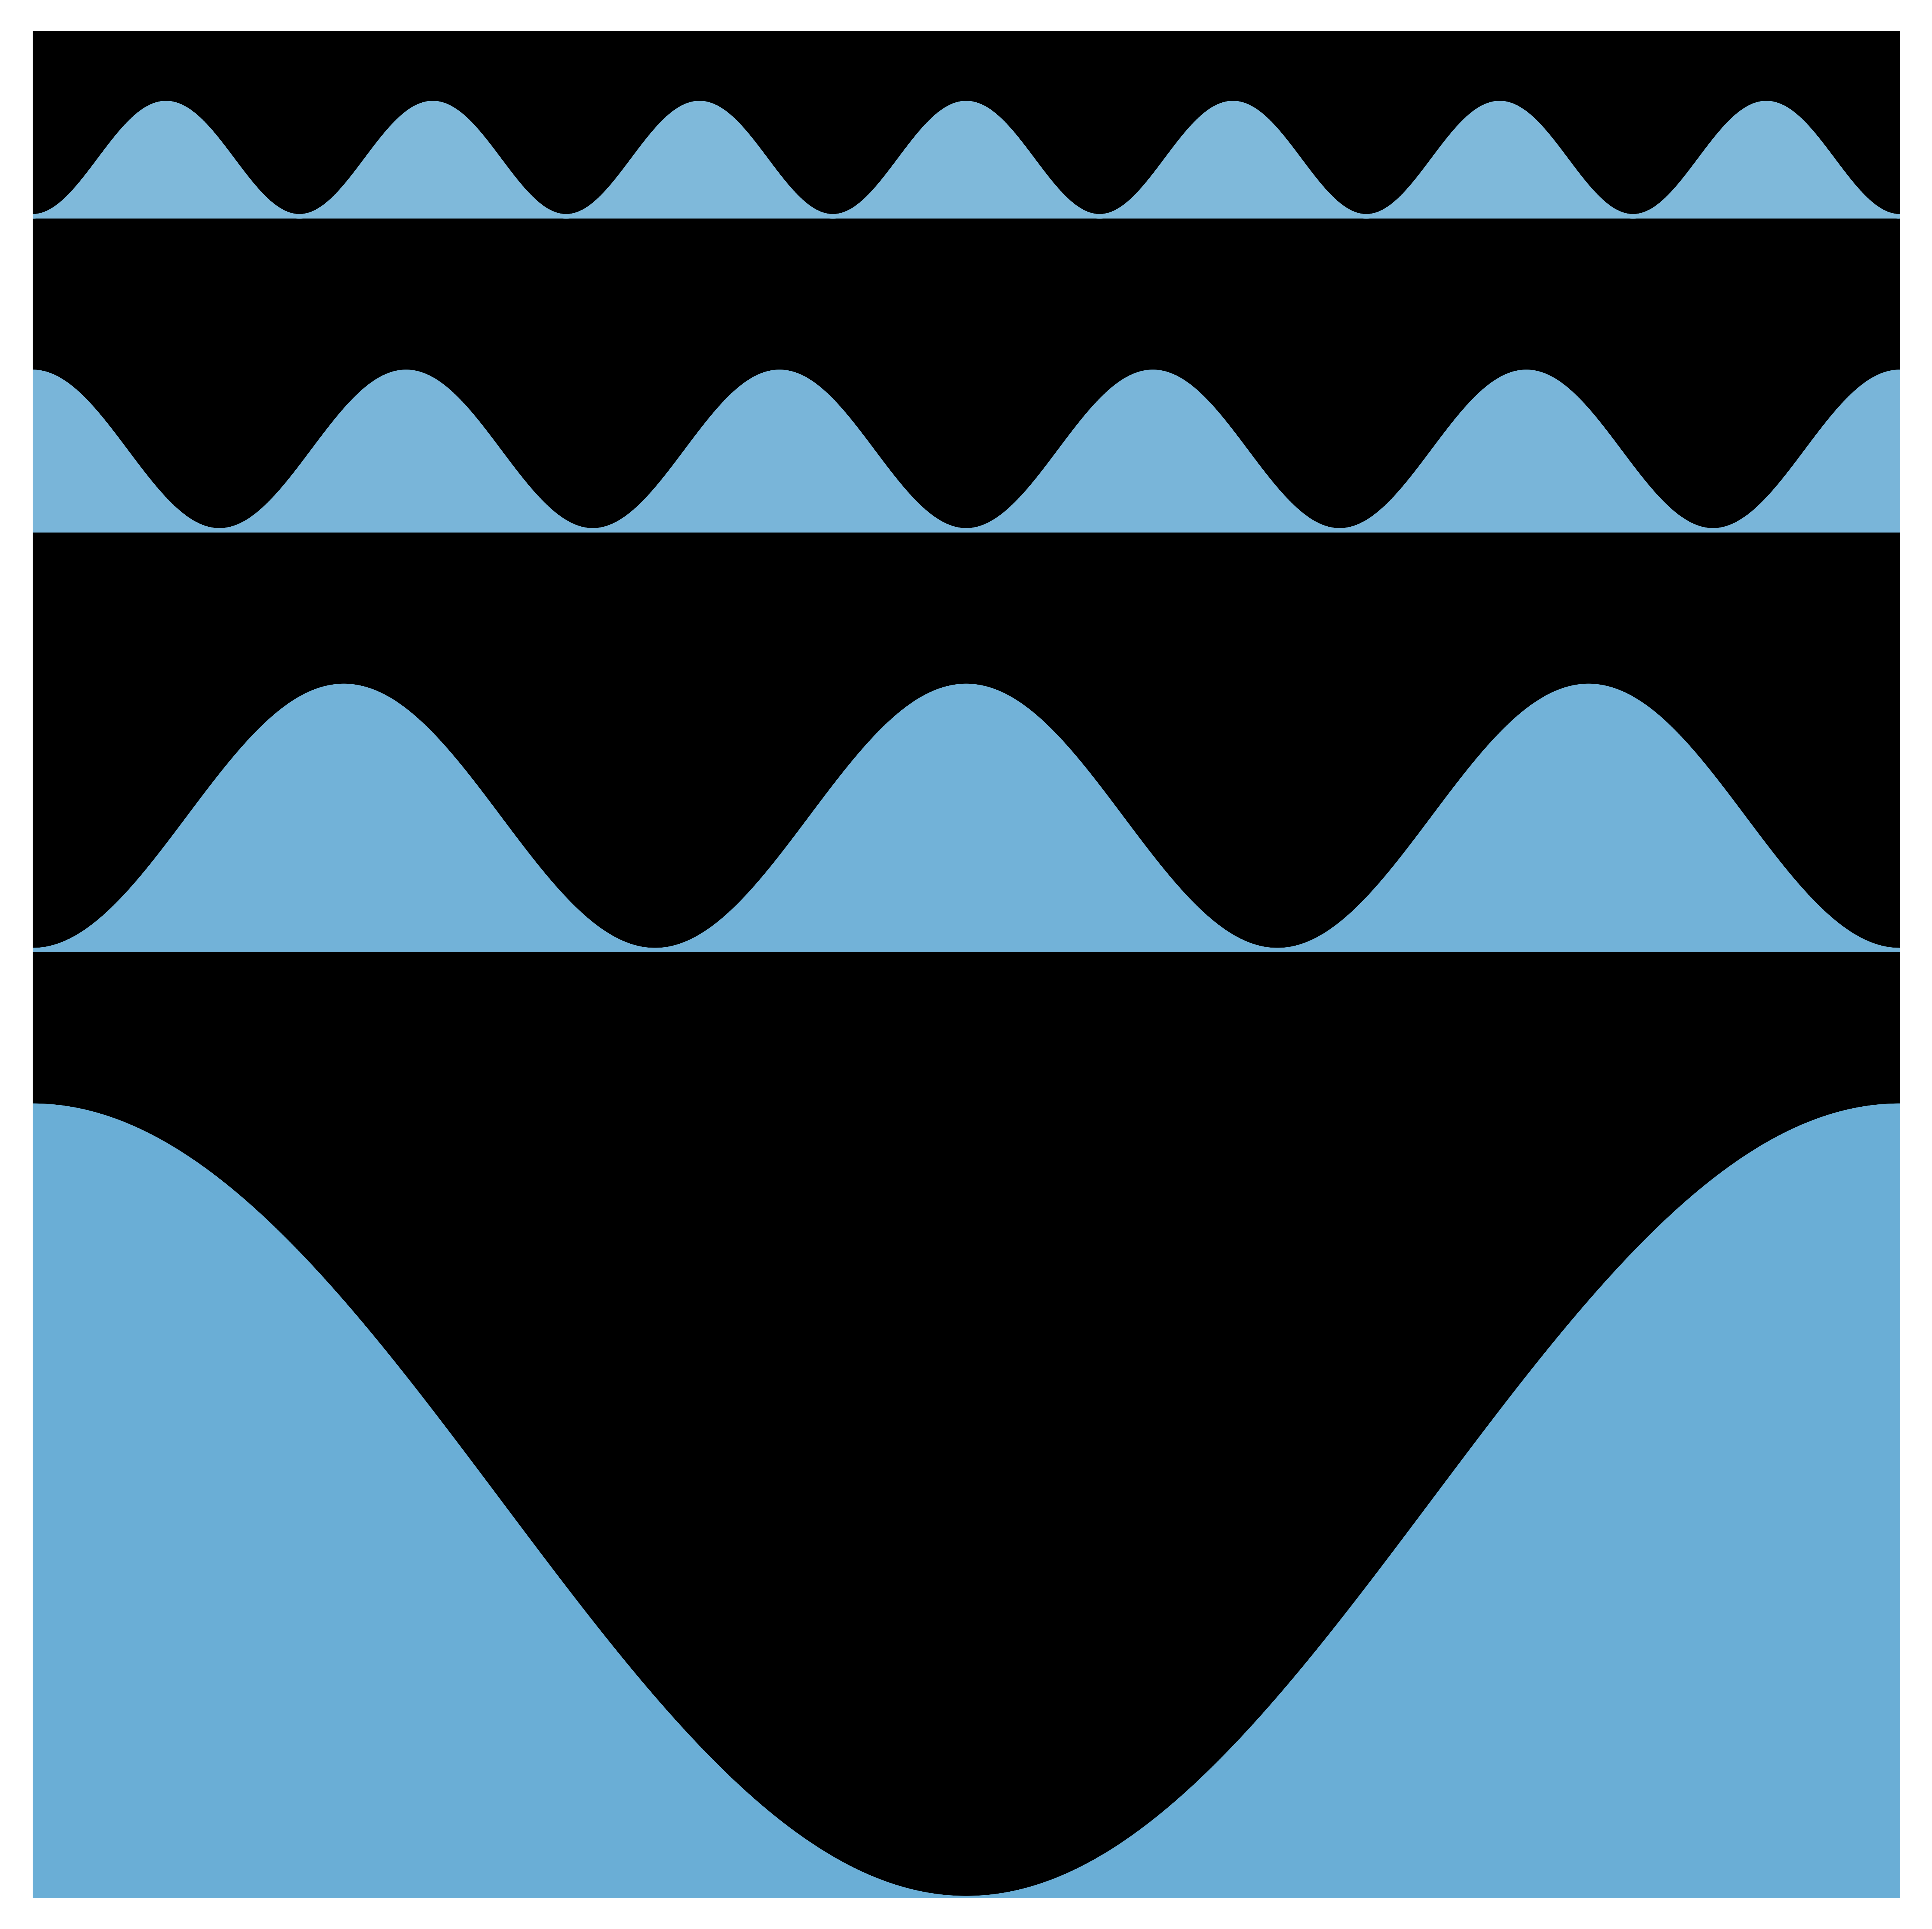

In [17]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from matplotlib import animation
import matplotlib.cm as cm
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'


N_pause = 20  #Half of the Number of frames to pause
              
    
N_fade = 10 #number of frames to fade in/out within the pause

N_fall = 100 #Number of frames it takes the highest harmonic to fall

N_frames = 2*N_fall + 2*N_pause #Total number of frames



nmax = 15   #max harmonic value. Since this is for a square wave it should be odd


dx = 0.0001
x = np.arange(0.5, 2.5, dx)
n_range = np.arange(1, nmax+1, 2)
zero = np.zeros(len(x))



square_total = np.zeros(len(x))
square_n = []
square_min=[]
offset_n = [np.zeros(len(x))]
offset_total = np.zeros(len(x))
square_sum_up_to = [np.zeros(len(x))]
square_min_sum = np.zeros(len(x))

for n in n_range:
    square_min.append(-4.0/(n*np.pi)*np.ones(len(x)))
    square_min_sum = square_min_sum -4.0/(n*np.pi)*np.ones(len(x))
    offset_total = offset_total + 8.0/(n*np.pi) + 0.5
    offset_n.append(offset_total)
    square_total = square_total + (4.0*np.sin(n*np.pi*x)/(n*np.pi))
    square_sum_up_to.append(square_total-square_min_sum)
    square_n.append(4.0*np.sin(n*np.pi*x)/(n*np.pi))


min_total = np.zeros(len(x))
for min_val in square_min:
    min_total = min_total + min_val

g = offset_n[-1][0]*2.0/(N_fall)**2 #This is gravitational acceleration for our animation
                                   #Chosen so the highest harmonic reaches the bottom at
                                   #N_fall frames

    
fig = plt.figure(figsize=(6, 6), dpi=800)
ax = fig.add_subplot(111)
ax.set_ylim(0, 6)
ax.set_xlim(0.5, 2.5)

#Remove all the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False,     #kill the labels
    color='black',
    direction='in')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks on top edge are off
    labelbottom=False, # ticks along the top edge are off
    color='black')
ax.spines['bottom'].set_position('zero')
ax.set_facecolor('black')

#This is the summed value, but completely transparent for now
total, = ax.plot(x, square_total-min_total, color='white', alpha=0.0)

#get rid of the giant white margins
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)


curves=[]

def init():
    total.set_alpha(0.0)
    for j in range(int((nmax+1)//2)):
        curves.append(ax.fill_between(x, offset_n[j], offset_n[j]+square_n[j]-square_min[j], 
                               color=cm.Blues((nmax-j)/2.0/nmax)))
    return (total,) + tuple(curves)

def animate(ii):

    if (ii > N_fall+N_pause): #if we've reached the midpoint
        i = N_frames-ii #turn around
    else:
        i = ii #proceed as normal
    new_offset = []
    for j in range(int((nmax+1)//2)):
        new_offset.append(np.maximum(offset_n[j] - 0.5*g*float(i)**2, #drop the floor
                                    square_sum_up_to[j]))  #until it hits the sum up to j
        curves[j].remove()
        curves[j] = ax.fill_between(x, new_offset[j], 
                                    new_offset[j]+square_n[j]-square_min[j], 
                                    color=cm.Blues((nmax-j)/2.0/nmax))
    
    if (i > N_fall-1):
        #Fade in the sum
        total.set_alpha(min((float(i)-N_fall)/N_fade, 1.0))
        #Fade out the harmonics
        for curve in curves:
            curve.set_alpha(max((N_fade-float(i)+N_fall)/N_fade, 0.0))

    return (total,) + tuple(curves)

curves=[]
for curve in curves:
    curve.remove()

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N_frames, interval=20, blit=False)

#not sure if this is necessary or not
for curve in curves:
    curve.remove()
curves = []
#output save file. 
anim.save('harmonic_rain.mp4', fps=20)
